In [ ]:
pip install pmdarima

In [55]:
import pandas as pd

# Load your CSV file
file_path = 'ACGL_DATA.csv'  # Replace with your actual file path
stock_data = pd.read_csv(file_path)

# Function to standardize date formats
def standardize_date_format(date_series):
    return pd.to_datetime(date_series, errors='coerce', infer_datetime_format=True).dt.strftime('%Y-%m-%d')

# Apply the function to the 'Date' column
stock_data['Date'] = standardize_date_format(stock_data['Date'])

# Save the cleaned dataset if needed
cleaned_file = 'Cleaned_ACGL_data2.csv'
stock_data.to_csv(cleaned_file, index=False)

print("Date format standardized. Cleaned data saved to:", cleaned_file)


Date format standardized. Cleaned data saved to: Cleaned_ACGL_data2.csv


In [56]:
# In Above cell i have cleaned the dataset using pandas where my original dataset having irregular date structures like (08/08/2023 and 08-08-2023)
# so i need to clean it by standardizing the Date column in dataset.

In [101]:

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

stock_data = pd.read_csv(
    'Cleaned_ACGL_data2.csv', 
    sep=',', 
    index_col='Date', 
    parse_dates=['Date'], 
    date_parser=lambda dates: pd.to_datetime(dates, format='%Y-%m-%d')  ).fillna(0)
stock_data

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-21,103.20,104.72,102.97,104.60,"1,013,401"
2024-08-20,102.97,103.29,102.28,102.80,"700,724"
2024-08-19,102.54,103.47,102.36,103.00,"865,195"
2024-08-16,102.31,102.90,101.53,102.55,"801,677"
2024-08-15,101.43,102.35,100.95,101.65,"1,076,510"
...,...,...,...,...,...
2023-08-25,75.47,75.61,74.49,74.62,"1,262,418"
2023-08-24,74.97,76.25,74.91,75.41,"1,189,784"
2023-08-23,74.52,75.76,74.52,75.40,"1,316,002"


In [102]:
# 1. pd.read_csv('Cleaned_ACGL_data.csv', ...)
# pd.read_csv(): This function is used to read a CSV (Comma-Separated Values) file into a Pandas DataFrame, which is a data structure for handling tabular data.
# 'Cleaned_ACGL_data.csv': This is the file path (or name if it's in the same directory) of the CSV file you want to read.

# 2. sep=','
# sep=',': This argument specifies the delimiter used in the CSV file. In this case, it's a comma (,), which is the default for CSV files. 
# If your file used a different delimiter (like a tab \t), you would specify that here.

# 3. index_col='Date'
# index_col='Date': This argument sets the column named Date as the index of the DataFrame. The index is a special column that is used to label the rows,
# and in this case, it will contain date values.

# 4. parse_dates=['Date']
# parse_dates=['Date']: This argument tells Pandas to automatically parse the Date column into datetime objects.
# Instead of treating the dates as plain strings, this converts them into a datetime format that can be used for time-series analysis.

# 5. date_parser=lambda dates: pd.to_datetime(dates, format='%Y-%m-%d')
# date_parser=lambda dates: pd.to_datetime(dates, format='%Y-%m-%d'): This argument allows you to specify a custom function to parse the date.
# lambda dates:: This creates an anonymous function that takes dates as input.
# pd.to_datetime(dates, format='%Y-%m-%d'): This function is used to convert the dates to datetime objects using the format specified
# ('%Y-%m-%d' corresponds to YYYY-MM-DD).

# 6. .fillna(0)
# .fillna(0): This method is called on the DataFrame after it is created. It fills any missing (NaN) values in the DataFrame with 0.
# This is useful for ensuring that your DataFrame has no missing values, which could cause errors or issues in further analysis.

# 7. stock_data
# stock_data: This is the variable where the resulting DataFrame is stored. After this line of code runs, stock_data will contain the entire CSV data,
# with the Date column as the index, parsed as datetime objects, and any missing values filled with 0.

# Summary:
# The code reads a CSV file named 'Cleaned_ACGL_data.csv' into a Pandas DataFrame.
# It uses the Date column as the index and ensures the dates are parsed in the YYYY-MM-DD format.
# Any missing values in the DataFrame are filled with 0.

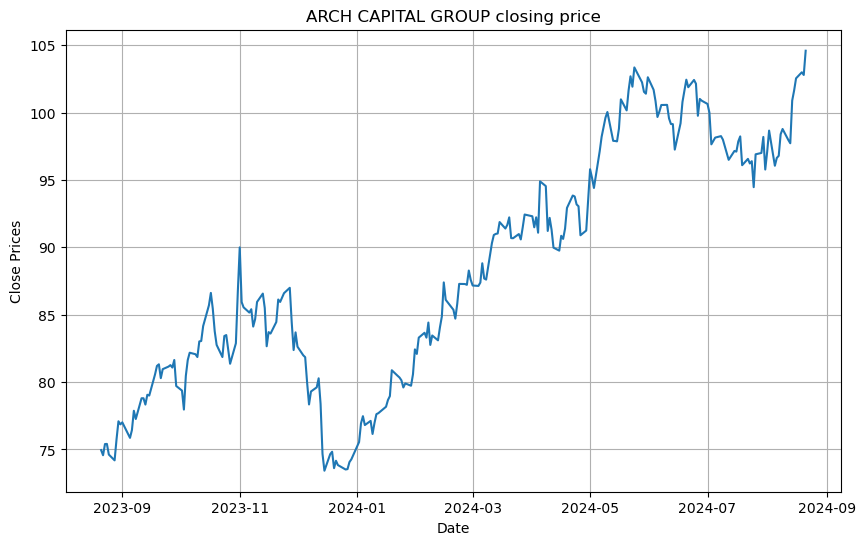

In [103]:
#plotting Daily Closing Price


plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

In [104]:
# 1. plt.figure(figsize=(10,6))
# plt.figure(figsize=(10,6)): This line creates a new figure for the plot with a specified size.
# The figsize argument takes a tuple that represents the width and height of the figure in inches. Here, the figure is 10 inches wide and 6 inches tall.

# 2. plt.grid(True)
# plt.grid(True): This line adds a grid to the plot, which helps in visualizing the data more clearly by providing reference lines across the plot.

# 3. plt.xlabel('Date')
# plt.xlabel('Date'): This line sets the label for the x-axis to "Date". Since your data is time-series with dates as the index, 
# the x-axis represents dates.

# 4. plt.ylabel('Close Prices')
# plt.ylabel('Close Prices'): This line sets the label for the y-axis to "Close Prices". The y-axis will represent the closing prices of the stock.

# 5. plt.plot(stock_data['Close'])
# plt.plot(stock_data['Close']): This line plots the closing prices ('Close' column) from your stock_data DataFrame against the index
# (which in this case is the date). By default, plt.plot() connects the data points with a line.

# 6. plt.title('ARCH CAPITAL GROUP closing price')
# plt.title('ARCH CAPITAL GROUP closing price'): This line sets the title of the plot to "ARCH CAPITAL GROUP closing price".
# The title is displayed at the top of the plot, giving context to the data being visualized.

# 7. plt.show()
# plt.show(): This line displays the plot. Without this, the plot would not be rendered in a script or a Jupyter Notebook cell.

# Summary:
# This code creates a plot that visualizes the closing prices of ARCH CAPITAL GROUP over time.
# The x-axis represents the date, and the y-axis represents the closing prices.
# The plot is made more readable with a grid and labeled axes, and it is titled appropriately to describe the data being shown.

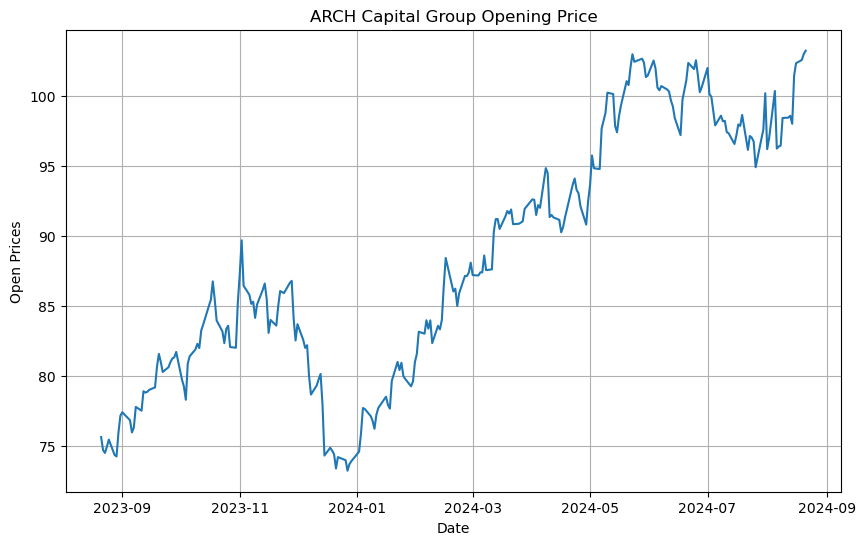

In [105]:
#plotting opening data

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(stock_data['Open'])
plt.title('ARCH Capital Group Opening Price')
plt.show()

<Axes: ylabel='Density'>

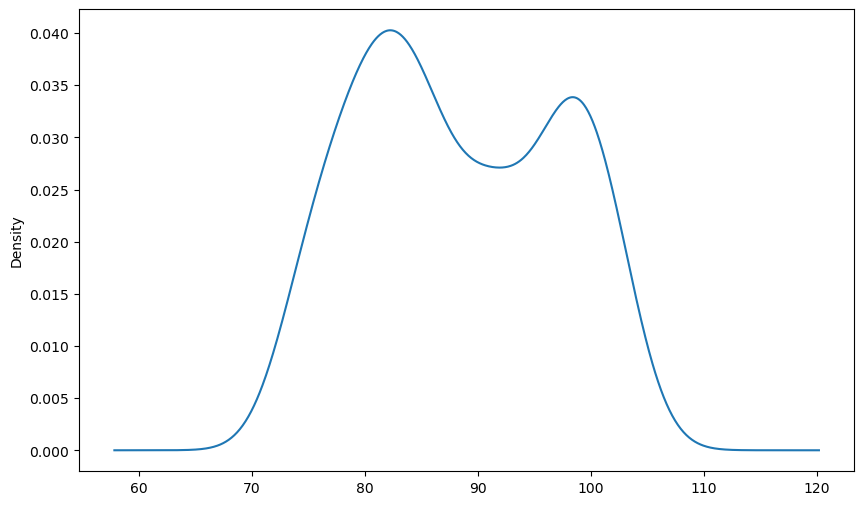

In [106]:
#Distribution of the dataset
stock_data_close = stock_data['Close']
stock_data_close.plot(kind='kde')

In [107]:
# 1. stock_data_close = stock_data['Close']
# stock_data_close = stock_data['Close']: This line extracts the 'Close' column from the stock_data DataFrame and assigns it to a new variable called stock_data_close.
# The 'Close' column contains the closing prices of the stock.

# 2. stock_data_close.plot(kind='kde')
# stock_data_close.plot(kind='kde'): This line creates a Kernel Density Estimate (KDE) plot of the stock_data_close data.
# The plot function is a versatile tool in Pandas that can create a variety of plots. By specifying kind='kde',
# you're telling Pandas to generate a KDE plot.

# Explanation of KDE Plot:
# Kernel Density Estimate (KDE) is a non-parametric way to estimate the probability density function of a random variable.
# It is essentially a smoothed version of a histogram, where the area under the curve sums to one, representing the entire distribution of the data.
# KDE plots are useful for visualizing the distribution of continuous data, giving you a sense of the "shape" of the data distribution—where the data
# is concentrated, and the presence of any modes or skewness.

# What This Code Does:
# The stock_data_close.plot(kind='kde') line will generate a KDE plot of the closing prices in your dataset.
# The x-axis will represent the values of the closing prices, and the y-axis will represent the estimated density of these values.
# The plot will help you understand how the closing prices are distributed—whether they follow a normal distribution, are skewed to one side,
# or have multiple peaks.

# Example Interpretation:
# If the KDE plot shows a single peak, it indicates that most of the closing prices are concentrated around a certain value.
# If the plot is skewed to the right, it suggests that there are more low closing prices with a long tail extending to the higher values.
# Multiple peaks may indicate that the data has more than one mode, possibly due to changes in market conditions over time.

# In summary, this code snippet is used to visualize the distribution of closing prices in the dataset,
# helping you gain insights into the nature of the data.

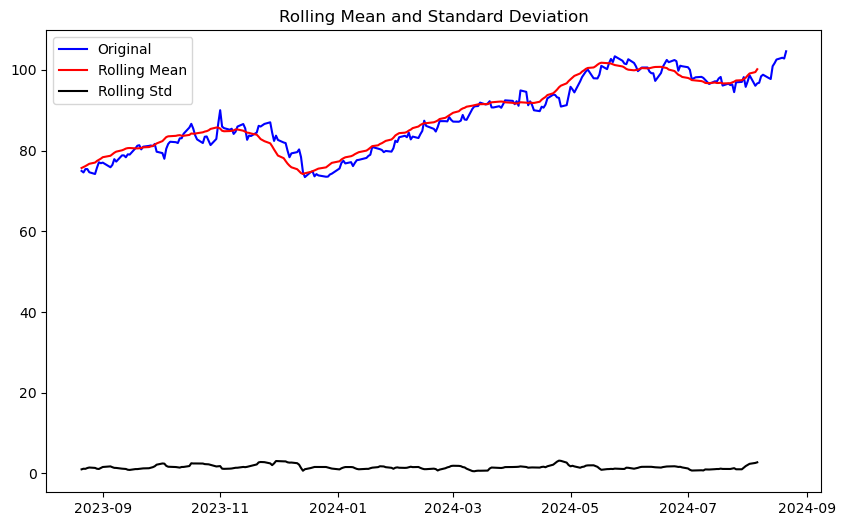

Results of dickey fuller test
Test Statistics                 -1.046757
p-value                          0.735831
No. of lags used                 3.000000
Number of observations used    249.000000
critical value (1%)             -3.456888
critical value (5%)             -2.873219
critical value (10%)            -2.572994
dtype: float64


In [108]:
#Test for staionarity

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for stock_datat will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(stock_data_close)


In [109]:
# The code snippet you've provided is designed to test the stationarity of a time series. Stationarity is a key concept in time series analysis, where the statistical properties of a time series (like mean and variance) are constant over time. Here's a detailed breakdown of the code:

# 1. test_stationarity(timeseries)
# def test_stationarity(timeseries):: This line defines a function called test_stationarity that takes one argument, timeseries, which represents the time series data you want to test for stationarity.
# 2. Calculating Rolling Statistics
# rolmean = timeseries.rolling(12).mean(): This line calculates the rolling mean (or moving average) of the time series over a window of 12 periods. This helps to smooth out short-term fluctuations and highlight longer-term trends or cycles in the data.

# rolstd = timeseries.rolling(12).std(): Similarly, this line calculates the rolling standard deviation over a window of 12 periods. The standard deviation gives an idea of the variability in the time series.

# 3. Plotting Rolling Statistics
# plt.plot(timeseries, color='blue',label='Original'): This line plots the original time series data in blue.

# plt.plot(rolmean, color='red', label='Rolling Mean'): This line plots the rolling mean in red.

# plt.plot(rolstd, color='black', label = 'Rolling Std'): This line plots the rolling standard deviation in black.

# plt.legend(loc='best'): This line adds a legend to the plot to differentiate between the original time series, rolling mean, and rolling standard deviation.

# plt.title('Rolling Mean and Standard Deviation'): This line adds a title to the plot.

# plt.show(block=False): This line displays the plot. The block=False parameter allows the plot to be shown without blocking the execution of further code (useful in interactive environments).

# 4. Augmented Dickey-Fuller Test (Astock_data Test)
# print("Results of dickey fuller test"): This line prints a header for the results of the Dickey-Fuller test.

# astock_datat = astock_datauller(timeseries,autolag='AIC'): This line performs the Augmented Dickey-Fuller test on the time series. The astock_datauller function tests the null hypothesis that a unit root is present in the time series (which would imply the series is non-stationary). The autolag='AIC' parameter automatically selects the lag length that minimizes the Akaike Information Criterion (AIC).

# 5. Displaying Astock_data Test Results
# output = pd.Series(astock_datat[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used']): This line creates a Pandas Series from the first four elements of the Astock_data test output, labeling them appropriately:

# Test Statistics: The test statistic from the Astock_data test.
# p-value: The p-value associated with the test statistic.
# No. of lags used: The number of lags used in the test.
# Number of observations used: The number of observations used in the test.
# for key,values in astock_datat[4].items():: This loop iterates over the dictionary of critical values returned by the Astock_data test.

# output['critical value (%s)'%key] = values: This line adds the critical values to the output series with appropriate labels.

# print(output): Finally, this line prints the output series, which includes the test statistic, p-value, number of lags, number of observations, and the critical values at different confidence levels (e.g., 1%, 5%, and 10%).

# What This Function Does:
# The function plots the rolling mean and standard deviation of the time series, which visually indicates if the mean and variance of the series are changing over time (suggesting non-stationarity).
# It then performs the Augmented Dickey-Fuller test to statistically test for stationarity. If the p-value is low (typically below 0.05), you can reject the null hypothesis, indicating that the time series is likely stationary.
# Interpretation:
# If the rolling mean and standard deviation are roughly constant over time, and the p-value from the Astock_data test is low (e.g., < 0.05), the time series is likely stationary.
# If the rolling mean and standard deviation vary over time, and the p-value is high (e.g., > 0.05), the time series is likely non-stationary.
# This function is a common first step in time series analysis to determine whether the series needs to be differenced or transformed to achieve stationarity before applying further modeling techniques like ARIMA.

<Figure size 1000x600 with 0 Axes>

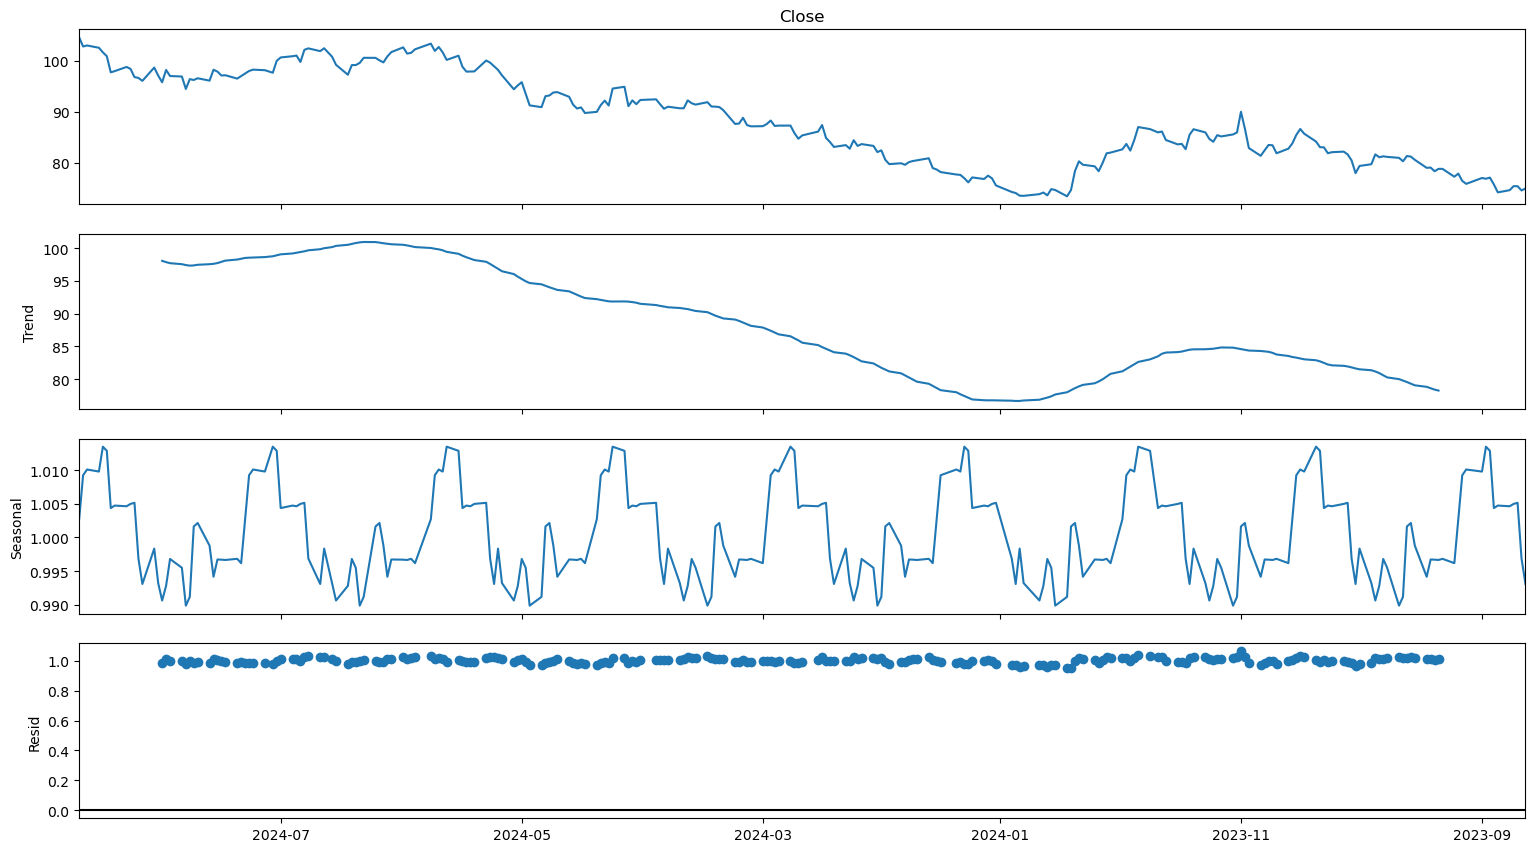

In [110]:
result = seasonal_decompose(stock_data_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [111]:
# The code above is for decomposing a time series into its component parts: 
# trend, seasonality, and residuals (random noise).
# This is a crucial step in time series analysis, as it helps you understand the underlying patterns and components of your data.
# Here's a breakdown of what the code does:

# 1. Decompose the Time Series
# result = seasonal_decompose(stock_data_close, model='multiplicative', period=30)
# seasonal_decompose: This function from the statsmodels library decomposes the time series into three components:

# Trend: The long-term progression of the series (e.g., increasing or decreasing trend).
# Seasonal: The repeating short-term cycle (e.g., monthly or weekly patterns).
# Residual: The remaining part after removing the trend and seasonality, which is often noise.
# stock_data_close: This is the time series data you want to decompose, specifically the 'Close' prices from your stock data.

# model='multiplicative': This specifies the type of decomposition.
# The multiplicative model assumes that the components multiply together to make up the time series.
# This is suitable when the variation in the time series increases or decreases proportionally to the level of the series.
# The additive model, on the other hand, assumes that the components add together. Choose the model based on the nature of your data.

# freq=30: This parameter indicates the number of observations per cycle, typically used to represent the seasonality period.
# Here, it's set to 30, suggesting that you expect a seasonal pattern every 30 periods
# (which could correspond to a monthly seasonality if your data is daily).

# 2. Plot the Decomposed Components
# python
# Copy code
# fig = plt.figure()
# fig = result.plot()
# fig.set_size_inches(16, 9)
# plt.figure(): This initializes a new figure for plotting.

# result.plot(): This plots the decomposed components of the time series: trend, seasonality, and residuals.

# fig.set_size_inches(16, 9): This sets the size of the figure to 16 inches by 9 inches, making the plot larger and more readable.

# The Output:
# The output of this code will be a plot with four subplots:

# Observed: The original time series.
# Trend: The long-term trend component of the series.
# Seasonal: The repeating pattern (seasonality) component of the series.
# Residual: The remaining component after removing the trend and seasonality.

# Interpretation:
# Trend: Helps you identify if the series is generally increasing, decreasing, or staying constant over time.
# Seasonal: Shows any repeating patterns or cycles within the data.
# Residual: Represents the noise or any unexplained variation after removing the trend and seasonal components. Ideally, 
# this should resemble white noise if the trend and seasonality are properly captured.
# This decomposition is particularly useful for understanding the underlying structure of your time series,
# which can inform further analysis or forecasting models.

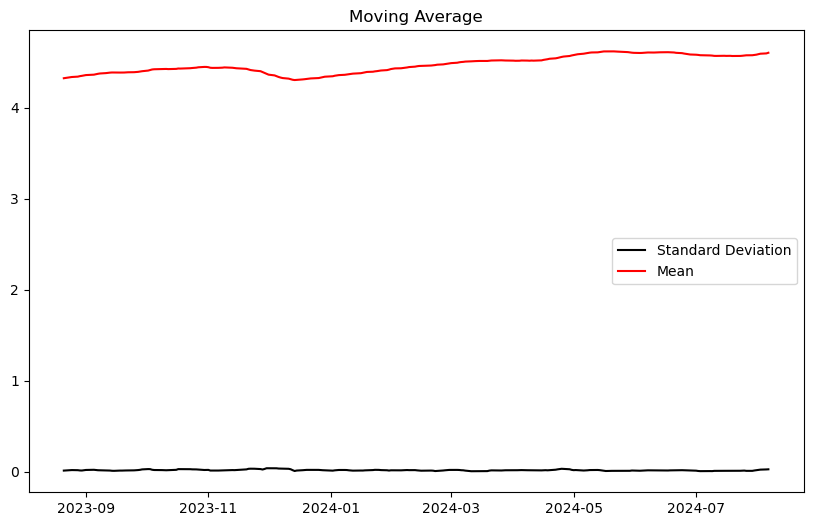

In [112]:

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
stock_data_log = np.log(stock_data_close)
moving_avg = stock_data_log.rolling(12).mean()
std_dev = stock_data_log.rolling(12).std()

plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend(loc='best')

plt.show()

In [113]:
# This code is designed to help eliminate the trend from your time series data by applying a log transformation and then calculating
# the moving average and standard deviation. Here’s an explanation of each step and the code:


# Code Explanation
# Importing the required modules:

# rcParams['figure.figsize'] = 10, 6: This sets the default figure size for the plots.
# Log Transformation:

# stock_data_log = np.log(stock_data_close): This applies a natural logarithm transformation to the stock_data_close data to stabilize the variance over time and make
# the series more stationary.
# Moving Average and Standard Deviation:

# moving_avg = stock_data_log.rolling(12).mean(): This calculates the moving average with a window of 12 time periods,
# which helps to smooth the data and reduce the impact of short-term fluctuations.

# std_dev = stock_data_log.rolling(12).std(): This calculates the rolling standard deviation over the same 12 periods,
# showing how much variation there is around the moving average.


# Plotting the Results:

# plt.plot(std_dev, color="black", label="Standard Deviation"): This plots the rolling standard deviation.

# plt.plot(moving_avg, color="red", label="Mean"): This plots the rolling mean (moving average).

# plt.legend(loc='best'): This adds a legend to the plot to distinguish between the standard deviation and the mean.

# plt.title('Moving Average'): This sets the title of the plot.

# plt.show(): This displays the plot.


# What This Code Does
# Log Transformation: This helps reduce the impact of large outliers and stabilize the variance.

# Moving Average: This helps to identify the underlying trend in the data by smoothing out short-term fluctuations.

# Standard Deviation: This shows the volatility of the time series around the moving average.


# Visualization
# The plot generated by this code will show the moving average in red and the standard deviation in black. 
# If your data is not stationary, this visualization will help you see how the trend is affecting your data,
# and the log transformation can help to stabilize it.


# Example Output
# You should see a plot with two lines: the red line representing the moving average and the black line representing the standard deviation.
# If the red line is relatively flat and the black line is small, your data is closer to being stationary.

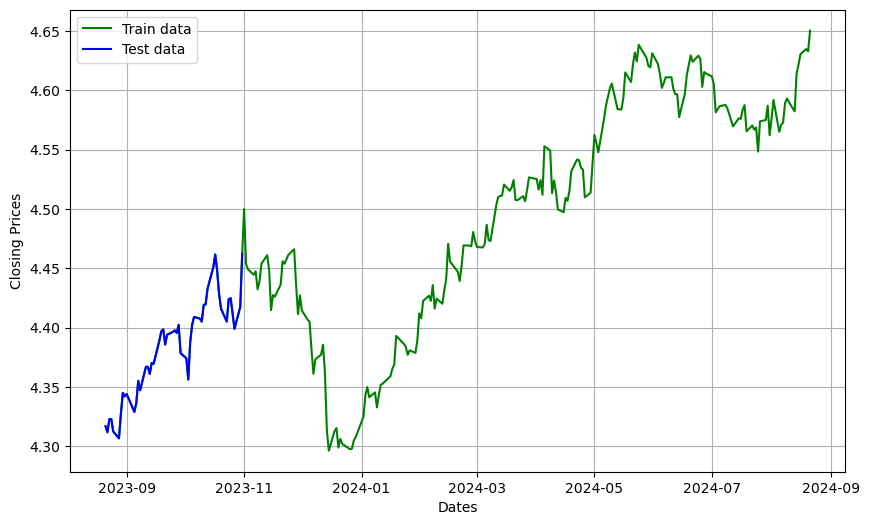

In [114]:
train_data, test_data = stock_data_log[3:int(len(stock_data_log)*0.8)], stock_data_log[int(len(stock_data_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(stock_data_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [115]:
# stock_data_log: This variable holds the log-transformed closing prices of the stock, which is a time series.



# Splitting:

# train_data:

# Starts from the 4th element of stock_data_log (stock_data_log[3]) to avoid any potential issues with the first few data points.

# Includes approximately the first 90% of the data (stock_data_log[:int(len(stock_data_log)*0.9)]).

# The int(len(stock_data_log)*0.9) calculates the index that corresponds to 90% of the total length of stock_data_log. This index is used to slice the dataset.

# test_data:

# Consists of the remaining 10% of the data (stock_data_log[int(len(stock_data_log)*0.9):]), starting from the 90% index to the end of the series.


# Splitting: The data is split into training (90%) and testing (10%) sets.

# Plotting: The entire log-transformed series is plotted in green, while the test data is overlaid in blue.

# Visualization: The plot helps visualize the separation of the training and testing data,
# making it easier to understand where the model's training stops and testing begins.

In [116]:
# It’s time to choose the ARIMA model’s p,q, and d parameters for this we’ll utilize Auto ARIMA to find the best parameters.

# To clarify, the p parameter in the ARIMA model denotes the number of lag observations included in the model,
# reflecting the autoregressive part that predicts future values based on past values.

# The d parameter represents the degree of differencing required to make the data stationary,
# addressing trends or seasonal effects by subtracting previous observations from current ones. 

# Lastly, q indicates the size of the moving average window, which incorporates the dependency of an observation on a residual error
# from a moving average model applied to lagged observations. 

# Understanding these parameters is crucial as they directly impact the model’s ability to capture the underlying patterns in the time series data.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1133.595, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1131.614, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1131.619, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1135.135, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1129.644, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.334 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  199
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 568.568
Date:                Fri, 23 Aug 2024   AIC                          -1135.135
Time:                        21:53:23   BIC                          -1131.847
Sample:                             0   HQIC                         -1133.805
                                - 199                                  

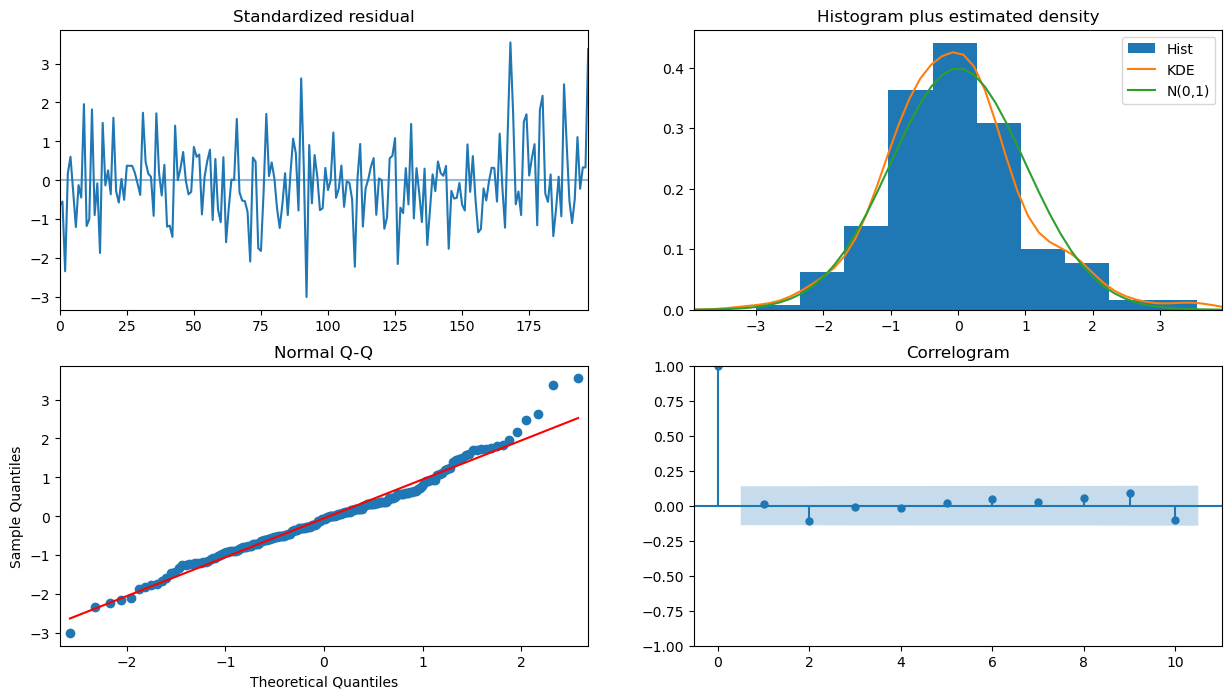

In [117]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [118]:
#CODE_EXPLANATION

# auto_arima(): This function is used to automatically determine the best parameters for an ARIMA model,
# which is commonly used for time series forecasting.

# Parameters Explained:

# train_data: The training dataset on which the ARIMA model will be fitted.

# start_p=0, start_q=0: These are the starting values for the p (autoregressive part) and q (moving average part) parameters.
# The model will start searching for the best p and q from these values.

# test='astock_data': This parameter indicates that the Augmented Dickey-Fuller (Astock_data) test should be used to determine the optimal differencing order (d).
# The Astock_data test checks for stationarity in the time series.

# max_p=3, max_q=3: These parameters set the maximum values for p and q that the model will consider during the search process.

# m=1: This specifies the frequency of the series. In this case, m=1 indicates that the data is not seasonal or has a frequency of 1.

# d=None: This allows the model to automatically determine the optimal value of d, the differencing order.

# seasonal=False: This indicates that the data does not have a seasonal component, so the model will not include seasonal terms.

# start_P=0, D=0: These are the starting values for the seasonal components of the model. Since seasonal=False,
# these parameters are not particularly relevant.

# trace=True: This prints the output of each step in the search process, showing the progress and the models being tried.

# error_action='ignore': This tells the model to ignore errors and continue with the next set of parameters.

# suppress_warnings=True: This suppresses warnings during the fitting process to keep the output clean.

# stepwise=True: This enables a stepwise search to find the optimal model, which is a more efficient approach than trying all combinations of parameters.

# Summary:

# Model Selection: The auto_arima function selects the best ARIMA model based on a stepwise search through potential parameter combinations.
# The Astock_data test is used to determine the need for differencing to make the series stationary.

# Model Evaluation: The diagnostic plots help assess whether the selected model is a good fit for the data.
# If the residuals are normally distributed and uncorrelated, the model is likely appropriate for the data.


In [119]:
#OUTPUT_EXPLANATION

# The stepwise search is used to automatically select the best ARIMA model by minimizing the AIC (Akaike Information Criterion), which measures the relative quality of statistical models. A lower AIC value indicates a better fit.

# The search considered different models:

# ARIMA(0,1,0)(0,0,0)[0] intercept: A model with no autoregressive (AR) or moving average (MA) terms, with a differencing order of 1 (d=1), and an intercept.
# ARIMA(1,1,0)(0,0,0)[0] intercept: A model with one AR term, no MA terms, a differencing order of 1, and an intercept.
# ARIMA(0,1,1)(0,0,0)[0] intercept: A model with one MA term, no AR terms, a differencing order of 1, and an intercept.
# ARIMA(0,1,0)(0,0,0)[0]: Similar to the first model but without the intercept.
# ARIMA(1,1,1)(0,0,0)[0] intercept: A model with both AR and MA terms.
# The model with the lowest AIC value is selected as the best model. In this case, ARIMA(0,1,0)(0,0,0)[0] was selected as the best model because it has the lowest AIC (-1135.135).

# The figure displays four key diagnostic plots for the fitted ARIMA model:

# Standardized Residual Plot (Top Left):

# Shows the residuals (errors) from the model after fitting. The residuals should ideally be centered around zero with no clear pattern, indicating a good fit. In your case, the residuals fluctuate around zero, which is expected in a well-fitted model.
# Histogram Plus Estimated Density (Top Right):

# Displays the distribution of the residuals, with a superimposed kernel density estimate (KDE) and a normal distribution curve (N(0,1)). The histogram appears roughly normal, though the KDE (orange) shows slight deviation, which the Jarque-Bera test has flagged as non-normal.
# Normal Q-Q Plot (Bottom Left):

# Plots the quantiles of the residuals against the quantiles of a standard normal distribution. If the residuals are normally distributed, the points should lie along the red line. In your plot, the points closely follow the line, but with some deviation at the tails, again hinting at slight non-normality.
# Correlogram (ACF Plot) (Bottom Right):

# Displays the autocorrelation function (ACF) of the residuals. The blue shaded area represents the 95% confidence interval. Ideally, the autocorrelations should lie within this band, indicating that residuals are not autocorrelated. In your case, most lags fall within this range, suggesting the model has accounted for the autocorrelation structure of the data.

In [121]:
total = len(stock_data)
aaa = 51
hist = total - aaa

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -325.884
Date:                Fri, 23 Aug 2024   AIC                            655.767
Time:                        21:56:58   BIC                            662.374
Sample:                             0   HQIC                           658.440
                                - 202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0726      0.088     -0.824      0.410      -0.245       0.100
sigma2         1.4989      0.126     11.897      0.000       1.252       1.746
Ljung-Box (L1) (Q):                   0.03   Jarque-

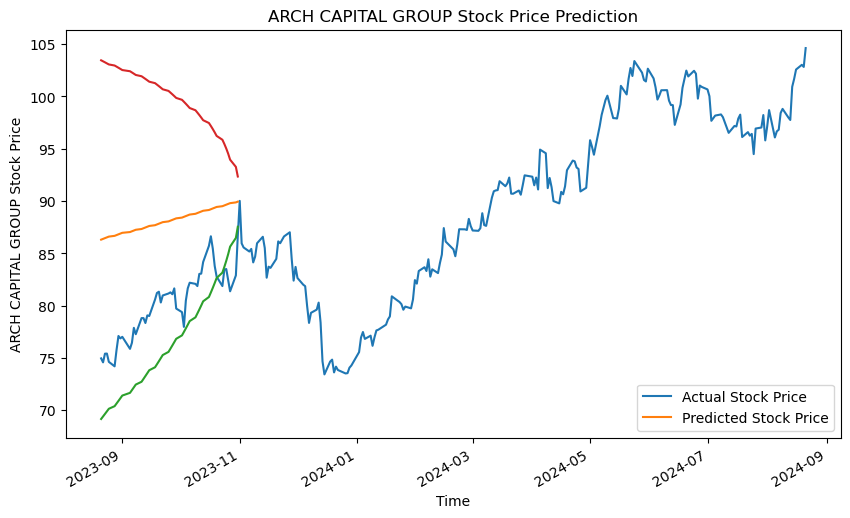

In [124]:
model = sm.tsa.statespace.SARIMAX(stock_data['Close'].values[:hist], trend='c', order=(0,1,0))
fitted = model.fit(disp=False)
print(fitted.summary())

result = fitted.forecast(aaa, alpha = 0.05)
conf_ins = fitted.get_forecast(aaa).summary_frame()
ind = np.arange(total)

fig, ax = plt.subplots()
ax.plot(stock_data.index, stock_data['Close'].values, label='Actual Stock Price')
ax.plot(stock_data.index[hist:], result, label='Predicted Stock Price')
ax.plot(stock_data.index[hist:], conf_ins['mean_ci_lower'])
ax.plot(stock_data.index[hist:], conf_ins['mean_ci_upper'])
ax.legend()
fig.autofmt_xdate()

plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')

plt.show()

In [125]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 7011.463509469619
MAE: 83.72811441540148
RMSE: 83.73448220100019
MAPE: 19.101171133817388


In [126]:
#From Above Forcasting we can Conclude that:

#Using SARIMAX model on this dataset provided the aacuracy = 80.90%